# Import Libraries


The libraries needed for data processing and building classification model are all imported.

In [1]:
import numpy as np
import pickle
import cv2
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

# Data Understanding and Data Preparation

In order to perform operations on the dataset images we define a couple of variables

#### reading dataset

In [2]:
# Dimension of resized image
IMAGE_RESIZE = tuple((224, 224))

# mensitioning the Number of images using for training the model
NUMBER_OF_IMAGES = 200

# loading dataset folder path
root_directory = 'Dataset_images/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
#root_directory='Corn_images'

# Specifying train and valid directory path
train_directory = os.path.join(root_directory, 'train')
#valid_directory = os.path.join(root_directory, 'valid')

#### printing the file names

In [3]:
for filenames in os.listdir(train_directory):
    print(filenames)

Strawberry___healthy
Grape___Black_rot
Potato___Early_blight
Blueberry___healthy
Corn_(maize)___healthy
Tomato___Target_Spot
.DS_Store
Peach___healthy
Potato___Late_blight
Tomato___Late_blight
Tomato___Tomato_mosaic_virus
Pepper,_bell___healthy
Orange___Haunglongbing_(Citrus_greening)
Tomato___Leaf_Mold
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Cherry_(including_sour)___Powdery_mildew
Apple___Cedar_apple_rust
Tomato___Bacterial_spot
Grape___healthy
Tomato___Early_blight
Corn_(maize)___Common_rust_
Grape___Esca_(Black_Measles)
Raspberry___healthy
Tomato___healthy
Cherry_(including_sour)___healthy
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Apple___Apple_scab
Corn_(maize)___Northern_Leaf_Blight
Tomato___Spider_mites Two-spotted_spider_mite
Peach___Bacterial_spot
Pepper,_bell___Bacterial_spot
Tomato___Septoria_leaf_spot
Squash___Powdery_mildew
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Apple___Black_rot
Apple___healthy
Strawberry___Leaf_scorch
Potato___healthy
Soybean___healthy


we need to remove .DS_Store file before processing

#### converting images to array

writing a function to convert and resize the images

In [4]:
# converting images to array
def convert_image_to_array(image_directory):
    try:
        image = cv2.imread(image_directory)
        if image is not None:
            image = cv2.resize(image, IMAGE_RESIZE)   
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

Iterating through the dataset folder and remove all the '.DS_Store' files from folder and resize the images from each of the folders and convert and load them into a NumPy array. 'total_images' storing the total images of all folder and 'total_image_each' will store the total number of images in each folder and 'mage_names' will store all the image folder names.

In [5]:
total_images=0
total_image_each,image_names, image_list, label_list = [], [], [], []
try:
    print("Loading all the images .........")
    plant_disease_folder_list = listdir(train_directory)
    for directory in plant_disease_folder_list :
        # remove .DS_Store from list
        if directory == ".DS_Store":
            plant_disease_folder_list.remove(directory)

    for plant_disease_folder in plant_disease_folder_list:
        
        images=os.listdir(train_directory+"/"+plant_disease_folder)
        #print(f"Processing {plant_disease_folder} ...")
        print(f"Number of images in {plant_disease_folder} : {len(images)}")
        total_image_each.append(len(images))
        image_names.append(plant_disease_folder)
        total_images+=len(images)
        plant_disease_image_list = listdir(f"{train_directory}/{plant_disease_folder}/")
        
        for single_plant_disease_image in plant_disease_image_list :
            # remove .DS_Store from list
            if single_plant_disease_image == ".DS_Store" :
                plant_disease_image_list.remove(single_plant_disease_image)
                    
        for image in plant_disease_image_list[:NUMBER_OF_IMAGES]:
            image_directory = f"{train_directory}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_disease_folder)
                

    print("loading images successfully completed")  
except Exception as e:
    print(f"Error : {e}")

# Transform the loaded training image data into numpy array
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print()

# Check the number of images loaded
image_len = len(image_list)
print(f"Total number of images loaded: {image_len}")
print(f"Total number of images: {total_images}")


Loading all the images .........
Number of images in Strawberry___healthy : 1824
Number of images in Grape___Black_rot : 1888
Number of images in Potato___Early_blight : 1939
Number of images in Blueberry___healthy : 1816
Number of images in Corn_(maize)___healthy : 1859
Number of images in Tomato___Target_Spot : 1827
Number of images in Peach___healthy : 1728
Number of images in Potato___Late_blight : 1939
Number of images in Tomato___Late_blight : 1851
Number of images in Tomato___Tomato_mosaic_virus : 1790
Number of images in Pepper,_bell___healthy : 1988
Number of images in Orange___Haunglongbing_(Citrus_greening) : 2010
Number of images in Tomato___Leaf_Mold : 1882
Number of images in Grape___Leaf_blight_(Isariopsis_Leaf_Spot) : 1722
Number of images in Cherry_(including_sour)___Powdery_mildew : 1683
Number of images in Apple___Cedar_apple_rust : 1795
Number of images in Tomato___Bacterial_spot : 1702
Number of images in Grape___healthy : 1692
Number of images in Tomato___Early_bl

In [6]:
plants = []
NumberOfDiseases = 0
for plant in label_list:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [7]:
print("Unique Plants are:")
for filenames in plants:
    print(filenames)

Unique Plants are:
Strawberry
Grape
Potato
Blueberry
Corn_(maize)
Tomato
Peach
Pepper,_bell
Orange
Cherry_(including_sour)
Apple
Raspberry
Squash
Soybean


In [8]:
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [9]:
nums = {}
for disease in label_list:
    nums[disease] = len(os.listdir(train_directory + '/' + disease))

In [10]:
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
print(img_per_class)
print()
print(f"Total number of images: {total_images}")

                                                    no. of images
Strawberry___healthy                                         1824
Grape___Black_rot                                            1888
Potato___Early_blight                                        1939
Blueberry___healthy                                          1816
Corn_(maize)___healthy                                       1859
Tomato___Target_Spot                                         1827
Peach___healthy                                              1728
Potato___Late_blight                                         1939
Tomato___Late_blight                                         1851
Tomato___Tomato_mosaic_virus                                 1790
Pepper,_bell___healthy                                       1988
Orange___Haunglongbing_(Citrus_greening)                     2010
Tomato___Leaf_Mold                                           1882
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Cherry_(in

Creating a bar chart to visualize total number of images in each name(class)

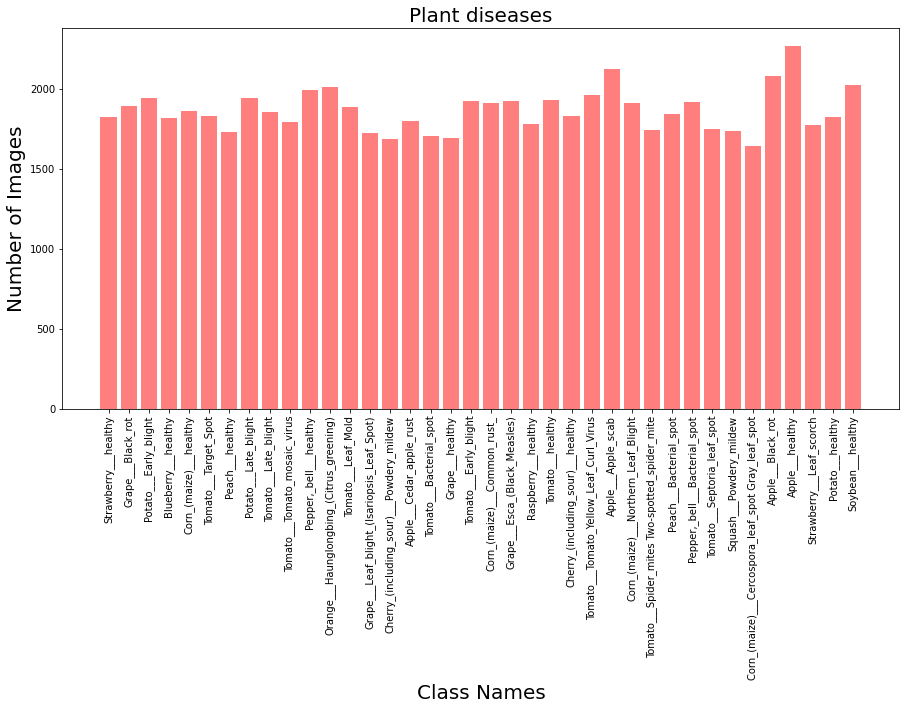

In [11]:
# Creating a bar chart to visualize total number of images in each name(class)
index = np.arange(len(image_names))
plt.figure(figsize=(15, 7))
plt.bar(index, total_image_each, align='center', alpha=0.5, color='red')
plt.xticks(index, image_names, fontsize=10, rotation=90)
plt.ylabel('Number of Images', fontsize=20)
plt.xlabel('Class Names', fontsize=20)
plt.title('Plant diseases', fontsize=20)
plt.show()

Once the image dataset is loaded, we can map each label or class of each plant disease to a unique value for the training task and saving them to a pickle file for predicting a label/class of plant disease from the output of the classification model.

In [12]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

pickle.dump(label_binarizer,open('plant_disease_label_transform.pkl', 'wb'))
number_of_classes = len(label_binarizer.classes_)

print("Total number of classes: ", number_of_classes)

Total number of classes:  38


# Augment and Split Dataset

In order to significantly increase the number of images in a dataset the data augmentation technique is used. For modifying our dataset various operations like shift, rotation, zoom and flip are performed on the image dataset.
Efficient learning of features from different areas of the same image is assisted by the provision of augmented images and it helps to perform better on unseen image data.


In [13]:
augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, 
                             fill_mode="nearest")

The loaded image dataset are split into two sets, namely train and test sets with a 0.2 split ratio (80% for training and 20% for testing). Train set for training the classification model and test set for validating the model while training.

In [14]:
# 80% for training and 20% for testing
print("Splitting data for testing and training.......")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

Splitting data for testing and training.......


# Build Model


All the hyperparameters of the plant disease classification model are defined here. Initially executing them in separate cells makes it easy to alter them later when needed.

In [15]:
EPOCHS = 10
STEPS = 100
LR = 1e-3
BATCH_SIZE = 32
WIDTH = 224
HEIGHT = 224
DEPTH = 3

For the classification task we form a sequential model. In this model, we are defaulting to “channel_last” architecture along with creating a switch for backends that support “channel_first” on the fourth line.
For the model, we first create a 2D Convolutional layer with 32 filters of 3 x 3 kernel and a ReLU (Rectified Linear Unit) activation. We then perform batch normalization, max pooling, and 25% (0.25) dropout operation in the following layers.
Next, we create two blocks of 2D Convolutional layer with 64 filters and ReLU activation followed by a pooling and dropout layer. We repeat this step for the last set of FC (Fully Connected) layers with 128 filters in the Conv2D layer being the only difference.


In [16]:
model = Sequential()
inputShape = (HEIGHT, WIDTH, DEPTH)
chanDim = -1

if K.image_data_format() == "channels_first":
    inputShape = (DEPTH, HEIGHT, WIDTH)
    chanDim = 1
    
# convolutional layer
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(number_of_classes))
# output layer
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 74, 74, 64)        0

# Train Model


Prior to starting the training of the model, the optimizer with learning rate and decay parameters that was defined above are initiated.  
The Adam optimization technique is selected as it almost always performs faster and has better global minimum convergence when compare with the other optimization techniques.


In [17]:
# Initialize optimizer
optimize = Adam(lr=LR, decay=LR / EPOCHS)

# Compile model
model.compile(loss="binary_crossentropy", optimizer=optimize, metrics=["accuracy"])

# Train model
print("Training network...")
history = model.fit(augment.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              validation_data=(x_test, y_test),
                              steps_per_epoch=len(x_train) // BATCH_SIZE,
                              epochs=EPOCHS, 
                              verbose=1)

Training network...
Epoch 1/10
190/190 [==============================] - 465s 2s/step - loss: 0.5959 - accuracy: 0.0605 - val_loss: 0.2410 - val_accuracy: 0.0270
Epoch 2/10
190/190 [==============================] - 555s 3s/step - loss: 0.1239 - accuracy: 0.2332 - val_loss: 0.1914 - val_accuracy: 0.0480
Epoch 3/10
190/190 [==============================] - 499s 3s/step - loss: 0.0896 - accuracy: 0.4257 - val_loss: 0.2569 - val_accuracy: 0.0546
Epoch 4/10
190/190 [==============================] - 509s 3s/step - loss: 0.0801 - accuracy: 0.4816 - val_loss: 0.0675 - val_accuracy: 0.5224
Epoch 5/10
190/190 [==============================] - 405s 2s/step - loss: 0.0701 - accuracy: 0.5616 - val_loss: 0.1186 - val_accuracy: 0.3250
Epoch 6/10
190/190 [==============================] - 393s 2s/step - loss: 0.0632 - accuracy: 0.5985 - val_loss: 0.0661 - val_accuracy: 0.5664
Epoch 7/10
190/190 [==============================] - 414s 2s/step - loss: 0.0561 - accuracy: 0.6454 - val_loss: 0.0720 - 

#  Model evaluation

#### Train and Valid Accuracy & Train and validation loss

The maximum accuracy achieved by a model along with minimizing the loss during the training phase is plotted on graph for comparison

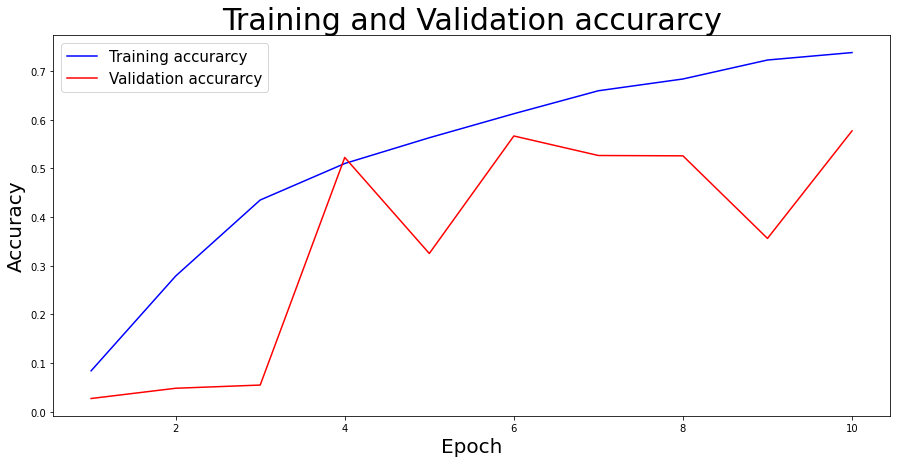

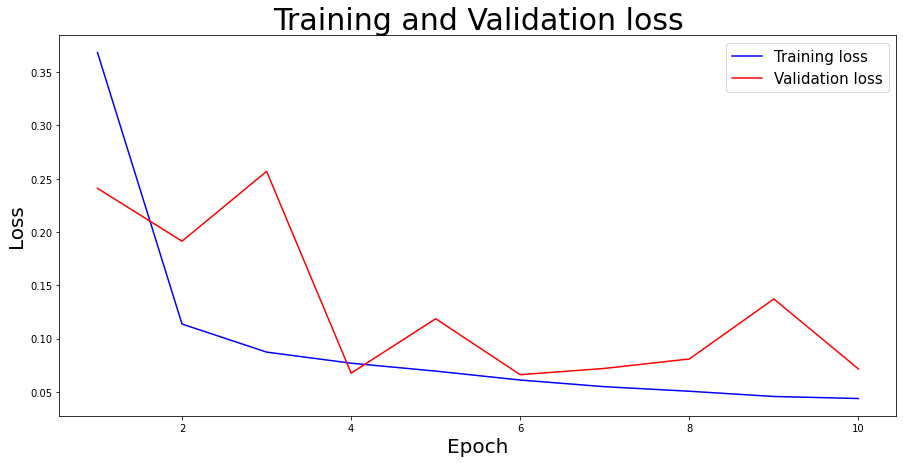

In [18]:
#Train and Valid Accuracy & Train and validation loss
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Train and validation accuracy
plt.figure(figsize=(15, 7))
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy', fontsize=30)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.legend(fontsize=15)


# Train and validation loss
plt.figure(figsize=(15, 7))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss', fontsize=30)
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.legend(fontsize=15)
plt.show()

A quick study of the above graphs show that the increase in training accuracy is directly proportional to increase in validation accuracy. Also along with the training loss decrease the validation loss decreases too.

Better results could be achieved by altering the learning rate or by training with more images or simply training the model for more epochs.


##### Checking the final loss and accuracy

In [19]:
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

48/48 [==============================] - 19s 400ms/step - loss: 0.0715 - accuracy: 0.5770
Final Loss: 0.07145041227340698, Final Accuracy: 0.5769736766815186


Text(0.5, 172.13374999999994, 'Predicted')

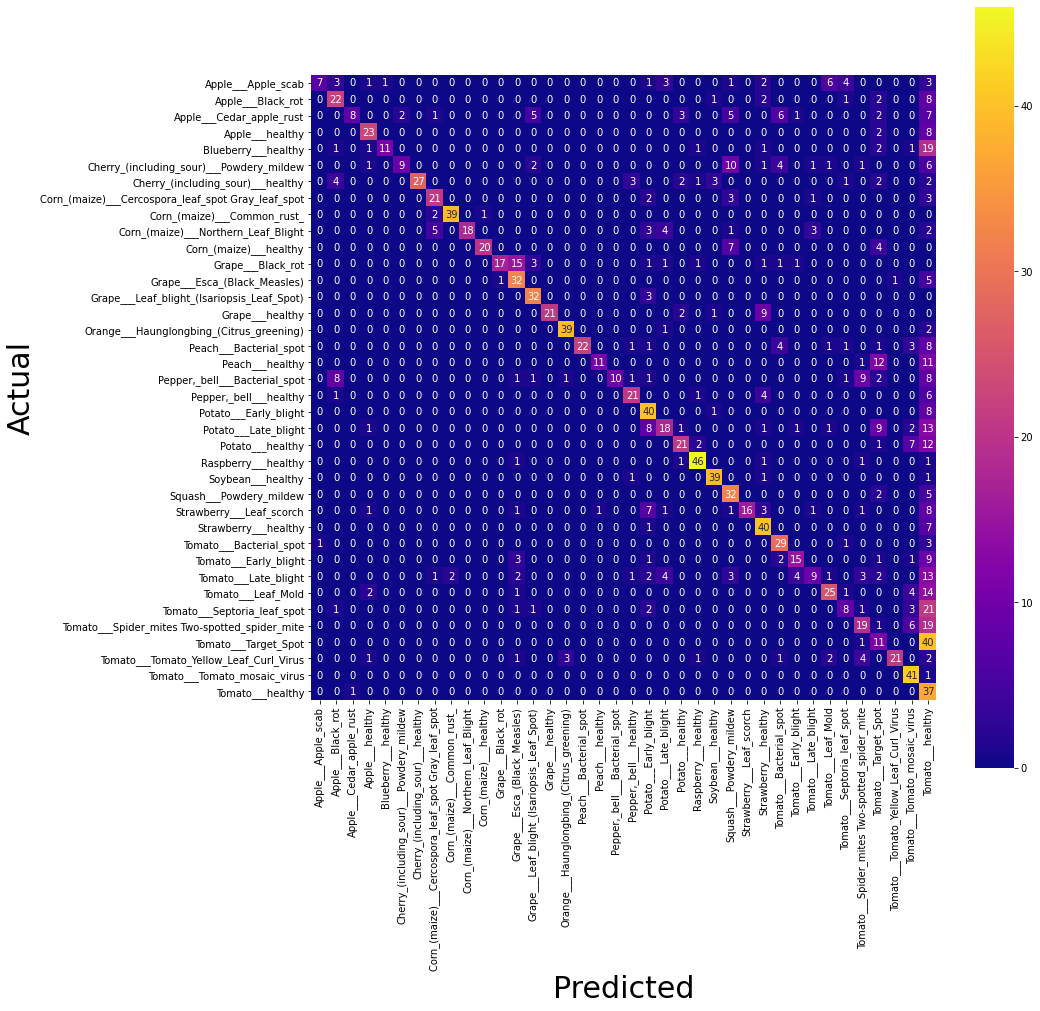

In [20]:
Y_pred = model.predict(x_test)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(14, 14))
ax = sns.heatmap(cm, cmap=plt.cm.plasma, annot=True, square=True, xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_)
ax.set_ylabel('Actual', fontsize=30)
ax.set_xlabel('Predicted', fontsize=30)

Checking the actual (test) accuracy of the model we trained 

In [21]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
48/48 [==============================] - 21s 446ms/step - loss: 0.0715 - accuracy: 0.5770
Test Accuracy: 57.697367668151855


# Save Model

Saving model for later use

In [22]:
print("Saving the model...")
model.save('plant_disease_classification_model.h5')

Saving the model...


In [23]:
# Dump pickle file of the labels
print("Saving the labels...")
filename = 'plant_disease_label_transform.pkl'
image_labels = pickle.load(open(filename, 'rb'))

Saving the labels...


# Test Model


The 'predict_disease' function is written to predict the class or disease

In [24]:
def predict_disease(image_path):
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float16) / 225.0
    np_image = np.expand_dims(np_image,0)
    plt.imshow(plt.imread(image_path))
    #result = model.predict_classes(np_image)
    result=np.argmax(model.predict(np_image), axis=-1)
    print((image_labels.classes_[result][0]))

Tomato___Bacterial_spot


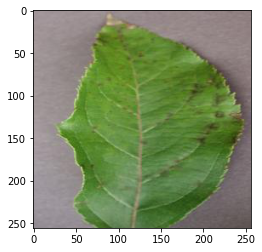

In [37]:
predict_disease('Images_for_testing/AppleScab1.JPG')

Tomato___Leaf_Mold


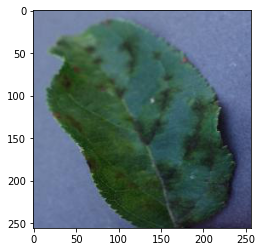

In [38]:
predict_disease('Images_for_testing/AppleScab2.JPG')

Potato___Early_blight


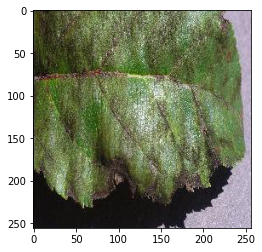

In [39]:
predict_disease('Images_for_testing/AppleScab3.JPG')

Potato___Early_blight


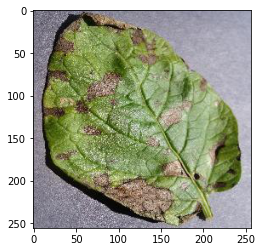

In [41]:
predict_disease('Images_for_testing/PotatoEarlyBlight1.JPG')

Strawberry___healthy


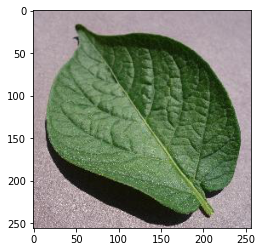

In [47]:
predict_disease('Images_for_testing/PotatoHealthy1.JPG')

Soybean___healthy


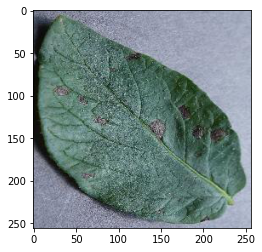

In [42]:

predict_disease('Images_for_testing/PotatoEarlyBlight3.JPG')

Corn_(maize)___Common_rust_


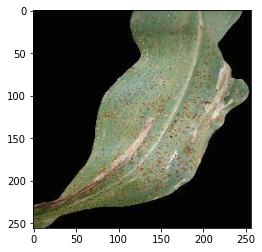

In [43]:
predict_disease('Images_for_testing/CornCommonRust1.JPG')

Corn_(maize)___Common_rust_


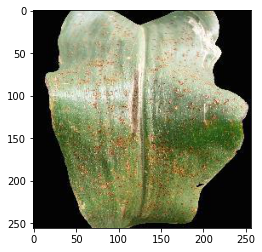

In [44]:
predict_disease('Images_for_testing/CornCommonRust2.JPG')

Corn_(maize)___Common_rust_


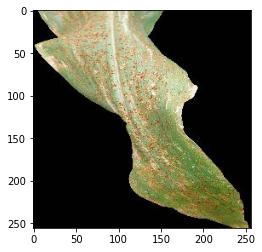

In [45]:
predict_disease('Images_for_testing/CornCommonRust3.JPG')

Tomato___Tomato_Yellow_Leaf_Curl_Virus


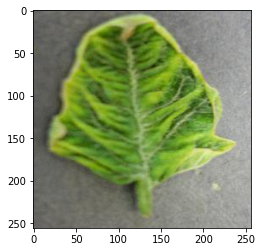

In [32]:
predict_disease('Images_for_testing/TomatoYellowCurlVirus6.JPG')

Tomato___healthy


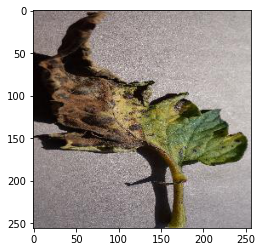

In [53]:
predict_disease('Images_for_testing/TomatoEarlyBlight1.JPG')

Tomato___Early_blight


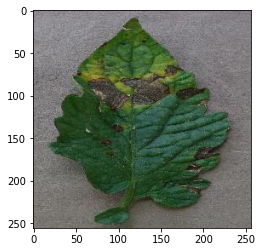

In [49]:
predict_disease('Images_for_testing/TomatoEarlyBlight4.JPG')